In [290]:
import torch
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [291]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import re
from wordcloud import WordCloud

In [292]:
nltk.download("vader_lexicon")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [293]:
def plot_pie_chart(df):
    # Count occurrences of each label
    sentiment_counts = df["label"].value_counts()

    # Convert to a DataFrame for seaborn plotting
    sentiment_df = sentiment_counts.reset_index()
    sentiment_df.columns = ["Sentiment", "Count"]
    sentiment_df["Sentiment"] = sentiment_df["Sentiment"].map(
        {1: "Positive Sentiment", 0: "Negative Sentiment"}
    )

    # Colors and theme settings
    colors = sns.color_palette("coolwarm", 2)
    sns.set_theme(style="whitegrid")

    # Plot with enhanced aesthetics
    plt.figure(figsize=(7, 7))
    plt.pie(
        sentiment_df["Count"],
        labels=sentiment_df["Sentiment"],
        autopct="%1.1f%%",
        startangle=140,
        counterclock=False,
        colors=colors,
        wedgeprops={"edgecolor": "grey", "linewidth": 1.5},
    )
    plt.title(
        "Sentiment Distribution", fontsize=15, fontweight="bold", color="darkslategray"
    )
    plt.show()

In [294]:
def process_text(text):
    # Convert text to lower case
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing special characters
    tokens = [re.sub(r"[^a-zA-Z0-9]", "", token) for token in tokens]
    tokens = [token for token in tokens if token]  # Remove empty strings

    # Removing stop words and punctuation
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return tokens

In [295]:
df = pd.read_csv("combined_reviews.csv")

In [296]:
df

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [297]:
df["Processed"] = df["text"].apply(process_text)

In [298]:
df

,text,label,Processed
0,So there is no way for me to plug it in here i...,0,"[way, plug, us, unless, go, convert]"
1,"Good case, Excellent value.",1,"[good, case, excel, valu]"
2,Great for the jawbone.,1,"[great, jawbon]"
3,Tied to charger for conversations lasting more...,0,"[tie, charger, convers, last, 45, minutesmajor..."
4,The mic is great.,1,"[mic, great]"
...,...,...,...
2743,I think food should have flavor and texture an...,0,"[think, food, flavor, textur, lack]"
2744,Appetite instantly gone.,0,"[appetit, instantli, gone]"
2745,Overall I was not impressed and would not go b...,0,"[overal, impress, would, go, back]"
2746,"The whole experience was underwhelming, and I ...",0,"[whole, experi, underwhelm, think, go, ninja, ..."


# EDA

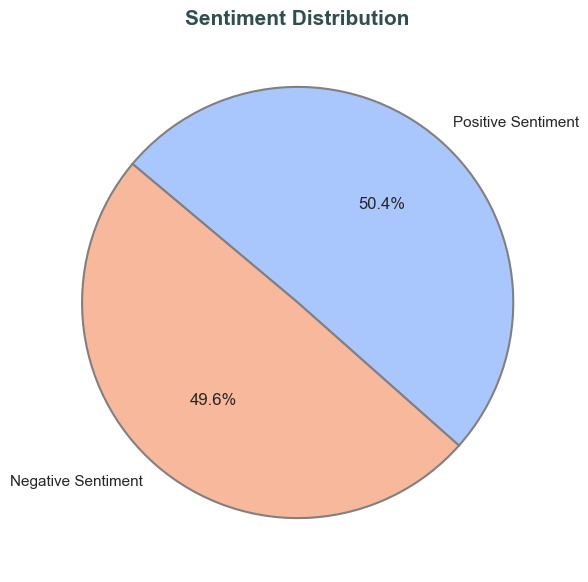

In [299]:
plot_pie_chart(df)

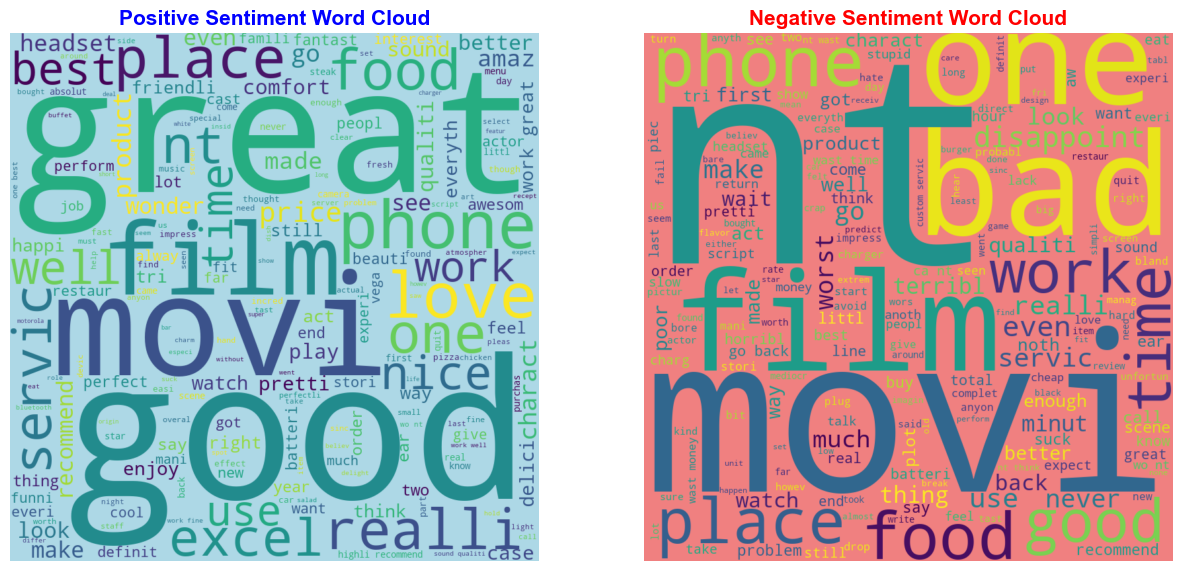

In [300]:
def plot_sentiment_word_clouds(positive_text, negative_text):
    # Create word clouds for positive and negative sentiments
    wordcloud_positive = WordCloud(
        width=800, height=800, background_color="lightblue"
    ).generate(positive_text)
    wordcloud_negative = WordCloud(
        width=800, height=800, background_color="lightcoral"
    ).generate(negative_text)

    # Plot side-by-side
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))

    # Positive word cloud
    axs[0].imshow(wordcloud_positive, interpolation="bilinear")
    axs[0].axis("off")
    axs[0].set_title(
        "Positive Sentiment Word Cloud", fontsize=15, fontweight="bold", color="blue"
    )

    # Negative word cloud
    axs[1].imshow(wordcloud_negative, interpolation="bilinear")
    axs[1].axis("off")
    axs[1].set_title(
        "Negative Sentiment Word Cloud", fontsize=15, fontweight="bold", color="red"
    )

    plt.show()


# Convert the processed tokens to strings
positive_text = " ".join(
    [" ".join(tokens) for tokens in df[df["label"] == 1]["Processed"]]
)
negative_text = " ".join(
    [" ".join(tokens) for tokens in df[df["label"] == 0]["Processed"]]
)

# Plot the word clouds
plot_sentiment_word_clouds(positive_text, negative_text)

## Convering data

In [301]:
df["processed_text"] = df["Processed"].apply(lambda x: " ".join(x))

vectorizer = CountVectorizer()  # Use TfidfVectorizer() if TF-IDF is preferred
X = vectorizer.fit_transform(df["processed_text"])

labels = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42
)

X_train_tensor = torch.tensor(X_train.toarray(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
import pickle

# Save the fitted vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [302]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes, dropout_prob=0.5):
        """

        Parameters:
            input_size: the size of the input features (number of tokens in vectorized form)
            num_classes: the number of classes for classification
            dropout_prob: dropout probability to prevent overfitting
        """
        super(NN, self).__init__()

        # First layer
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)

        # Second layer
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)

        # Third layer
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)

        # Output layer
        self.fc4 = nn.Linear(32, num_classes)

        # Dropout layer
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        """
        Defines the forward pass of the neural network.
        """
        # First fully connected layer with ReLU, batch norm, and dropout
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)

        # Second fully connected layer with ReLU, batch norm, and dropout
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)

        # Third fully connected layer with ReLU, batch norm, and dropout
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)

        # Output layer (no activation needed here; suitable for classification)
        x = self.fc4(x)
        return x

In [303]:
# Define hyperparameters
input_size = X_train.shape[1]
num_classes = 2
learning_rate = 0.001
batch_size = 32
num_epochs = 25

In [311]:
print(X_train.shape[1])

4073


In [304]:
def train_model(model, train_loader, optimizer, criterion, num_epochs):
    """
    Train the model and plot the loss over epochs.

    Parameters:
        model (nn.Module): The neural network model to train.
        train_loader (DataLoader): DataLoader for the training dataset.
        optimizer (torch.optim.Optimizer): Optimizer for updating the model's parameters.
        criterion (nn.Module): Loss function.
        num_epochs (int): Number of epochs for training.

    Returns:
        None
    """
    # Store the loss for each epoch to plot later
    epoch_losses = []

    # Training loop
    for epoch in range(num_epochs):
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        model.train()
        epoch_loss = 0  # To accumulate loss for the current epoch

        for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
            # Flatten the input data if necessary, ensuring compatibility with nn.Linear
            data = data.view(data.shape[0], -1)  # Not strictly needed if already flat

            # Forward pass
            scores = model(data)
            loss = criterion(scores, targets)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()

            # Update weights
            optimizer.step()

            # Accumulate batch loss
            epoch_loss += loss.item()

        # Average loss for the epoch
        avg_epoch_loss = epoch_loss / len(train_loader)
        epoch_losses.append(avg_epoch_loss)
        print(f"Average Loss at epoch {epoch+1}: {avg_epoch_loss:.4f}")

    # Plot the loss over epochs
    plt.plot(range(1, num_epochs + 1), epoch_losses, marker="o")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss vs. Epoch")
    plt.show()

Epoch [1/25]


100%|██████████| 69/69 [00:02<00:00, 28.13it/s]


Average Loss at epoch 1: 0.7105
Epoch [2/25]


100%|██████████| 69/69 [00:00<00:00, 116.30it/s]


Average Loss at epoch 2: 0.6209
Epoch [3/25]


100%|██████████| 69/69 [00:00<00:00, 120.06it/s]


Average Loss at epoch 3: 0.4878
Epoch [4/25]


100%|██████████| 69/69 [00:00<00:00, 114.28it/s]


Average Loss at epoch 4: 0.3585
Epoch [5/25]


100%|██████████| 69/69 [00:00<00:00, 76.02it/s] 


Average Loss at epoch 5: 0.2740
Epoch [6/25]


100%|██████████| 69/69 [00:00<00:00, 70.16it/s]


Average Loss at epoch 6: 0.2161
Epoch [7/25]


100%|██████████| 69/69 [00:00<00:00, 103.55it/s]


Average Loss at epoch 7: 0.1970
Epoch [8/25]


100%|██████████| 69/69 [00:00<00:00, 119.63it/s]


Average Loss at epoch 8: 0.1774
Epoch [9/25]


100%|██████████| 69/69 [00:00<00:00, 116.99it/s]


Average Loss at epoch 9: 0.1670
Epoch [10/25]


100%|██████████| 69/69 [00:00<00:00, 106.39it/s]


Average Loss at epoch 10: 0.1569
Epoch [11/25]


100%|██████████| 69/69 [00:00<00:00, 86.70it/s] 


Average Loss at epoch 11: 0.1531
Epoch [12/25]


100%|██████████| 69/69 [00:00<00:00, 71.23it/s]


Average Loss at epoch 12: 0.1378
Epoch [13/25]


100%|██████████| 69/69 [00:00<00:00, 95.87it/s] 


Average Loss at epoch 13: 0.1218
Epoch [14/25]


100%|██████████| 69/69 [00:00<00:00, 121.31it/s]


Average Loss at epoch 14: 0.1301
Epoch [15/25]


100%|██████████| 69/69 [00:00<00:00, 104.08it/s]


Average Loss at epoch 15: 0.1241
Epoch [16/25]


100%|██████████| 69/69 [00:00<00:00, 116.71it/s]


Average Loss at epoch 16: 0.1293
Epoch [17/25]


100%|██████████| 69/69 [00:00<00:00, 116.53it/s]


Average Loss at epoch 17: 0.1160
Epoch [18/25]


100%|██████████| 69/69 [00:00<00:00, 74.79it/s] 


Average Loss at epoch 18: 0.1010
Epoch [19/25]


100%|██████████| 69/69 [00:00<00:00, 78.19it/s]


Average Loss at epoch 19: 0.1117
Epoch [20/25]


100%|██████████| 69/69 [00:00<00:00, 108.61it/s]


Average Loss at epoch 20: 0.1015
Epoch [21/25]


100%|██████████| 69/69 [00:00<00:00, 112.35it/s]


Average Loss at epoch 21: 0.0901
Epoch [22/25]


100%|██████████| 69/69 [00:01<00:00, 62.39it/s] 


Average Loss at epoch 22: 0.0830
Epoch [23/25]


100%|██████████| 69/69 [00:00<00:00, 79.74it/s]


Average Loss at epoch 23: 0.0775
Epoch [24/25]


100%|██████████| 69/69 [00:01<00:00, 68.79it/s]


Average Loss at epoch 24: 0.1052
Epoch [25/25]


100%|██████████| 69/69 [00:01<00:00, 54.73it/s]


Average Loss at epoch 25: 0.0686


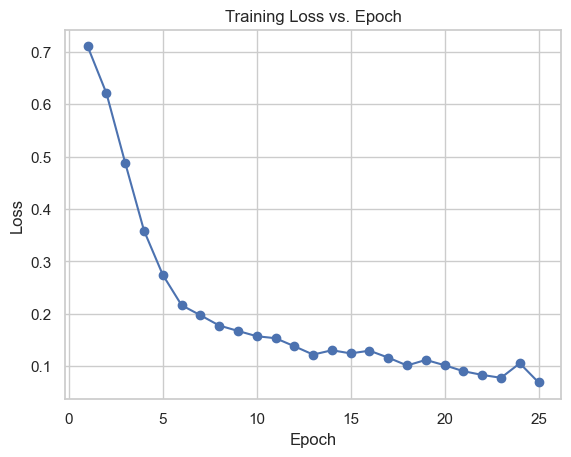

In [305]:
model = NN(input_size=input_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_model(model, train_loader, optimizer, criterion, num_epochs)

In [306]:
# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    """
    Check accuracy of our trained model given a loader and a model.

    Parameters:
        loader: torch.utils.data.DataLoader
            A loader for the dataset you want to check accuracy on.
        model: nn.Module
            The model you want to check accuracy on.

    Returns:
        acc: float
            The accuracy of the model on the dataset given by the loader.
    """
    num_correct = 0
    num_samples = 0
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        for x, y in loader:
            # Flatten the input if needed
            x = x.view(x.shape[0], -1)  # Ensure correct shape for nn.Linear input

            # Forward pass
            scores = model(x)
            _, predictions = scores.max(1)  # Get class predictions
            num_correct += (predictions == y).sum().item()  # Count correct predictions
            num_samples += predictions.size(0)  # Count total samples

    model.train()  # Set model back to training mode
    return num_correct / num_samples  # Return accuracy as a fraction


# Example usage to check accuracy on training and test sets
print(f"Accuracy on training set: {check_accuracy(train_loader, model) * 100:.2f}%")
print(f"Accuracy on test set: {check_accuracy(test_loader, model) * 100:.2f}%")

Accuracy on training set: 99.50%
Accuracy on test set: 81.82%


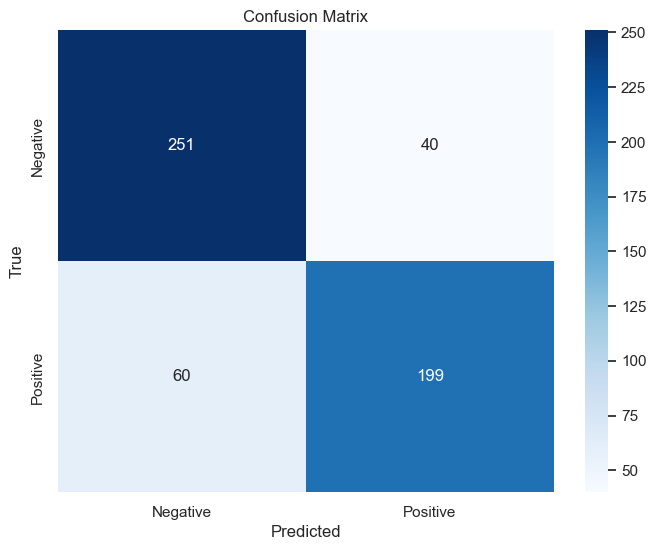

Accuracy: 0.8181818181818182
F1 Score: 0.817551086253804
Precision: 0.8191113464828973
Recall: 0.8181818181818182


In [307]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)


def evaluate_model(loader, model):
    """
    Evaluates the model on the given data loader and calculates the confusion matrix, accuracy, F1 score, precision, and recall.

    Parameters:
        loader (DataLoader): DataLoader for the dataset to evaluate.
        model (nn.Module): The trained model to evaluate.

    Returns:
        metrics (dict): A dictionary containing accuracy, F1 score, precision, and recall.
    """
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, targets in loader:
            data = data.view(data.shape[0], -1)  # Flatten if necessary
            scores = model(data)
            _, predictions = scores.max(1)
            all_preds.extend(predictions.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    # Calculate confusion matrix and metrics
    cm = confusion_matrix(all_targets, all_preds)
    accuracy = accuracy_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds, average="weighted")
    precision = precision_score(all_targets, all_preds, average="weighted")
    recall = recall_score(all_targets, all_preds, average="weighted")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"],
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Return calculated metrics
    metrics = {
        "accuracy": accuracy,
        "f1_score": f1,
        "precision": precision,
        "recall": recall,
    }
    return metrics


# Example usage:
metrics = evaluate_model(test_loader, model)
print("Accuracy:", metrics["accuracy"])
print("F1 Score:", metrics["f1_score"])
print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])

In [308]:
# Load the fitted vectorizer
with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)


# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [re.sub(r"[^a-zA-Z0-9]", "", token) for token in tokens if token]
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(tokens)


# Function to predict label
def predict_text_label(text, model):
    # Preprocess and vectorize the input text
    processed_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([processed_text]).toarray()
    input_tensor = torch.tensor(vectorized_text, dtype=torch.float32)

    # Model prediction
    model.eval()
    with torch.no_grad():
        scores = model(input_tensor)
        _, predicted_label = scores.max(1)

    # Map numerical label to text label
    label_map = {0: "Negative", 1: "Positive"}
    return label_map[predicted_label.item()]


# Example usage:
text = "I love this product! It's amazing."
label = predict_text_label(text, model)
print(f"Predicted Label: {label}")

Predicted Label: Positive


In [309]:
text = "Mother Fucker u made me proud"
label = predict_text_label(text, model)
print(f"Predicted Label: {label}")

Predicted Label: Negative


In [310]:
torch.save(model.state_dict(), "model.pth")